# **Détection et classification des maladies des plantes 🌱**

Utilise un CNN pour détecter les maladies des feuilles à partir d’images et recommander des traitements.

L'importation des bibliotheques

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# **Malade / Sain**

# 1. Préparation des données




In [ ]:
print(os.listdir("plantvillage/segmented"))

['Apple-Black_rot', '.ipynb_checkpoints', 'Apple-healthy', 'Apple-Apple_scab', 'Apple-Cedar_apple_rust']


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 1️⃣ Chemin vers le dataset
dataset_path = "plantvillage/segmented"

# 2️⃣ Nom des dossiers contenant les images
CLASSES_ORIGINALES = ['Apple-Apple_scab', 'Apple-healthy', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']

# 3️⃣ Redéfinir en deux classes : 0 = sain, 1 = malade
CLASSE_SAINE = ['Apple-healthy']
CLASSE_MALADE = ['Apple-Apple_scab', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']

# 4️⃣ Paramètres des images
IMG_SIZE = 224

# 5️⃣ Initialisation des listes
X = []
y = []

# 6️⃣ Chargement des images
for class_name in CLASSES_ORIGINALES:
    class_path = os.path.join(dataset_path, class_name.strip())
    label = 0 if class_name in CLASSE_SAINE else 1  # 0 = sain, 1 = malade

    print(f"Chargement des images depuis : {class_path} (label {label})")

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0

            X.append(img)
            y.append(label)

        except Exception as e:
            print(f"Erreur lors du traitement de l’image {img_path} : {e}")

# 7️⃣ Conversion en numpy arrays
X = np.array(X)
y = to_categorical(np.array(y), num_classes=2)  # 2 classes : sain / malade

# 8️⃣ Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Nombre d’images en train : {len(X_train)}")
print(f"Nombre d’images en test  : {len(X_test)}")


Chargement des images depuis : plantvillage/segmented/Apple-Apple_scab (label 1)
Chargement des images depuis : plantvillage/segmented/Apple-healthy (label 0)
Chargement des images depuis : plantvillage/segmented/Apple-Cedar_apple_rust (label 1)
Chargement des images depuis : plantvillage/segmented/Apple-Black_rot (label 1)
Nombre d’images en train : 1656
Nombre d’images en test  : 415


# 2.   Construction du modèle CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

CLASSES = ['malade', 'sain']
IMG_SIZE = 224  # correspond à la taille réelle des images d'entrée

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(CLASSES), activation='softmax')  # 2 classes donc 2 sorties
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# 3.Entraînement & Validation du modèle

In [ ]:
print("Shape de X_train:", X_train.shape)


Shape de X_train: (1656, 224, 224, 3)


In [ ]:
# Paramètres
EPOCHS = 3
#EPOCHS = 20
BATCH_SIZE = 32

# Entraînement + Validation
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=2  # pour avoir un résumé plus lisible à chaque epoch
)


Epoch 1/3
52/52 - 176s - 3s/step - accuracy: 0.7645 - loss: 0.4865 - val_accuracy: 0.8386 - val_loss: 0.3749
Epoch 2/3
52/52 - 192s - 4s/step - accuracy: 0.8545 - loss: 0.3284 - val_accuracy: 0.9157 - val_loss: 0.2550
Epoch 3/3
52/52 - 211s - 4s/step - accuracy: 0.8919 - loss: 0.2471 - val_accuracy: 0.9108 - val_loss: 0.2176


1. Matrice de confusion

13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step


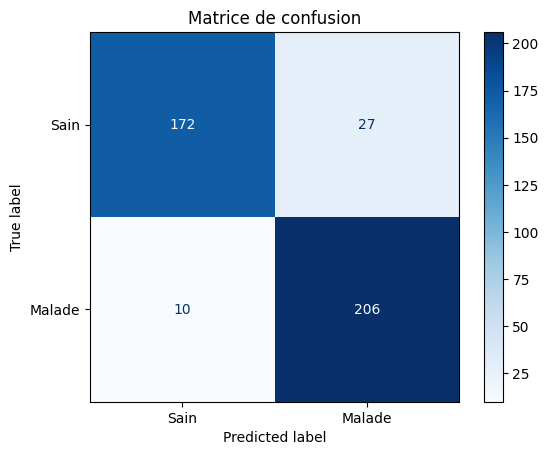

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Prédictions sur les données de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sain", "Malade"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()


2. Rapport de classification

In [ ]:
from sklearn.metrics import classification_report

print("Rapport de classification :\n")
print(classification_report(y_true, y_pred_classes, target_names=["Sain", "Malade"]))


Rapport de classification :

              precision    recall  f1-score   support

        Sain       0.95      0.86      0.90       199
      Malade       0.88      0.95      0.92       216

    accuracy                           0.91       415
   macro avg       0.91      0.91      0.91       415
weighted avg       0.91      0.91      0.91       415



# 4.Visualisation des performances (accuracy et loss)

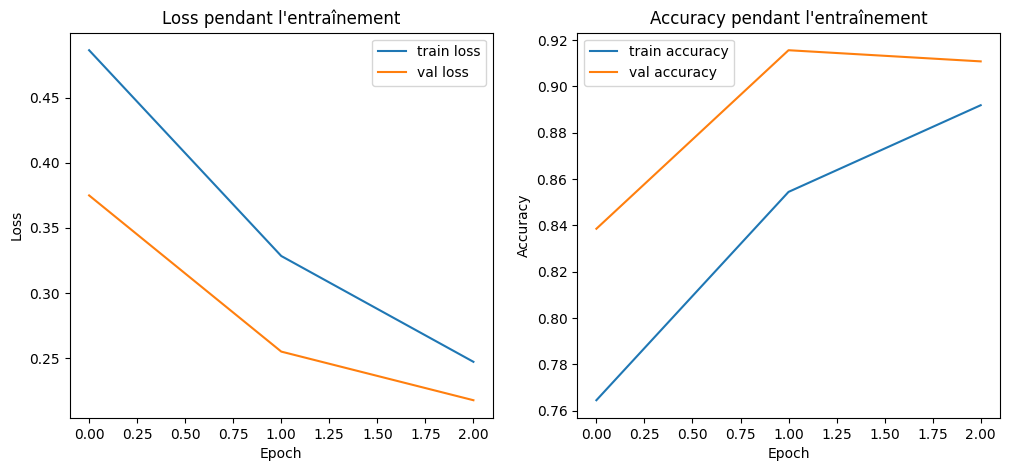

In [ ]:
import matplotlib.pyplot as plt

# Courbe de loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss pendant l'entraînement")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy pendant l'entraînement")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


# 5.prédictions avec les images

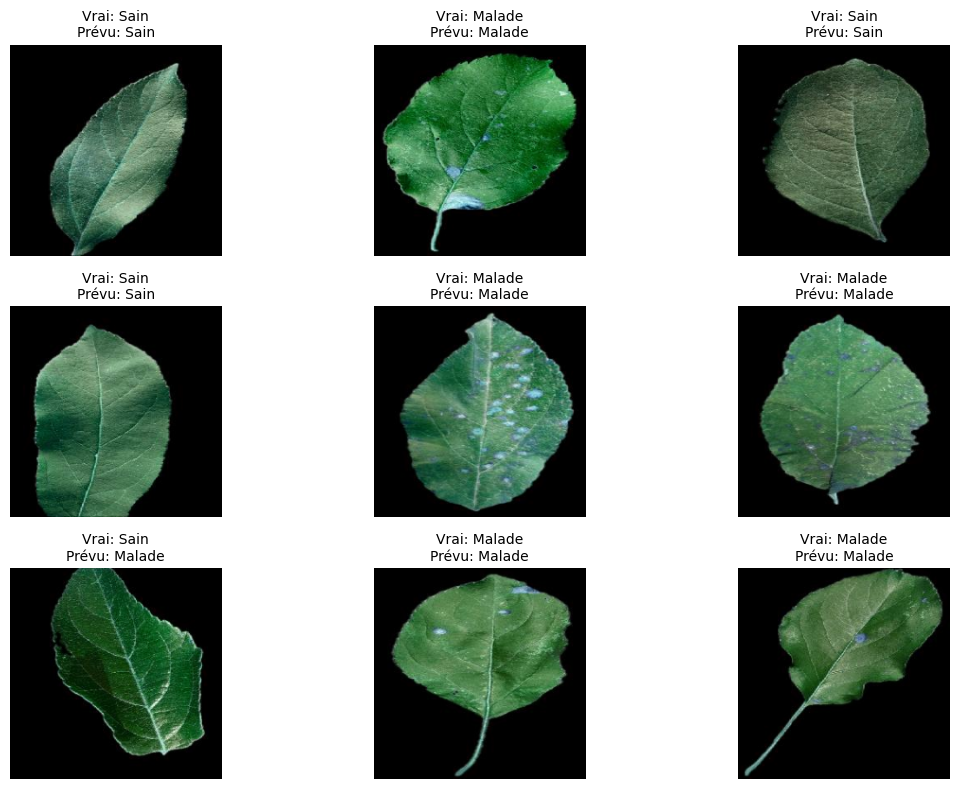

In [ ]:
import random
import matplotlib.pyplot as plt

labels = ["Sain", "Malade"]

plt.figure(figsize=(12, 8))
for i in range(9):
    index = random.randint(0, len(X_test) - 1)
    img = X_test[index]
    true_label = labels[np.argmax(y_test[index])]
    pred_label = labels[np.argmax(y_pred[index])]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Vrai: {true_label}\nPrévu: {pred_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


-Distribution des classes dans les données

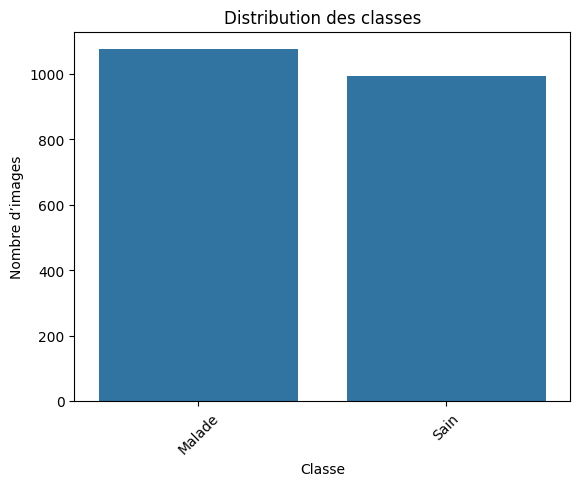

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nombre d’exemples par classe dans l’ensemble complet
labels = np.argmax(y, axis=1)
labels_names = ["Sain", "Malade"]
label_names = [labels_names[i] for i in labels]

sns.countplot(x=label_names)
plt.title("Distribution des classes")
plt.xticks(rotation=45)
plt.xlabel("Classe")
plt.ylabel("Nombre d’images")
plt.show()


-Courbe ROC

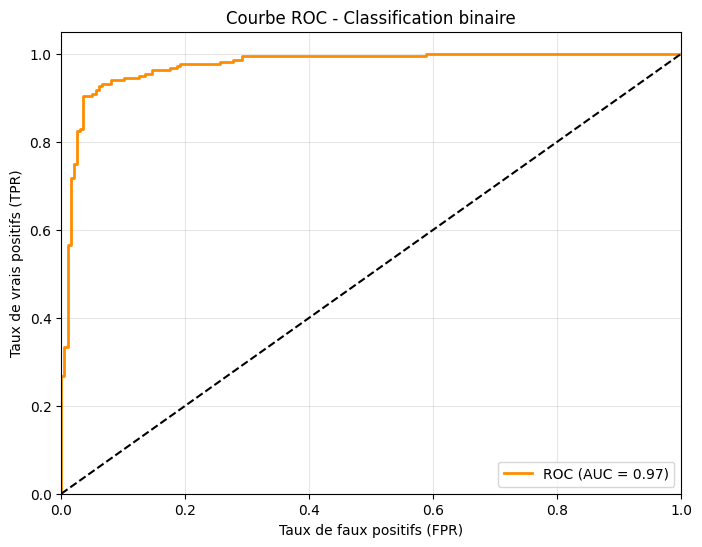

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Si y_true est 1D (ex : [0, 1, 0, 1, ...])
y_true_binary = y_true

# y_pred est supposé être les probabilités pour la classe positive (index 1)
y_pred_binary = y_pred[:, 1]

# Calcul ROC + AUC
fpr, tpr, _ = roc_curve(y_true_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Classification binaire")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


# **Les multiclasses**


# Les traitements basés sur la prédiction

# 1. Préparation des données

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Même chemin dataset
dataset_path = "plantvillage/segmented"

# Toutes les classes originales séparées (pas regroupées)
CLASSES_ORIGINALES = ['Apple-Apple_scab', 'Apple-healthy', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']

# Map classe -> label numérique unique
label_map = {name: idx for idx, name in enumerate(CLASSES_ORIGINALES)}

IMG_SIZE = 224

X_multi = []
y_multi = []

for class_name in CLASSES_ORIGINALES:
    class_path = os.path.join(dataset_path, class_name.strip())
    label = label_map[class_name]

    print(f"Chargement des images depuis : {class_path} (label {label})")

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0

            X_multi.append(img)
            y_multi.append(label)

        except Exception as e:
            print(f"Erreur lors du traitement de l’image {img_path} : {e}")

X_multi = np.array(X_multi)
y_multi = to_categorical(np.array(y_multi), num_classes=len(CLASSES_ORIGINALES))

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

print(f"Nombre d’images multi-classes en train : {len(X_train_multi)}")
print(f"Nombre d’images multi-classes en test  : {len(X_test_multi)}")


Chargement des images depuis : plantvillage/segmented/Apple-Apple_scab (label 0)
Chargement des images depuis : plantvillage/segmented/Apple-healthy (label 1)
Chargement des images depuis : plantvillage/segmented/Apple-Cedar_apple_rust (label 2)
Chargement des images depuis : plantvillage/segmented/Apple-Black_rot (label 3)
Nombre d’images multi-classes en train : 1656
Nombre d’images multi-classes en test  : 415


# 2.Construction du modèle CNN

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Liste des classes multi-classes (exemple 4 classes)
CLASSES = ['Apple-Apple_scab', 'Apple-healthy', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']
IMG_SIZE = 224  # taille des images

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(CLASSES), activation='softmax')  # nombre de classes = taille de CLASSES
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # adaptée pour multi-classes one-hot
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# 3.Entraînement & Validation du modèle

In [6]:
# Maintenant, entraînement du modèle (supposons que ton model est déjà défini)
EPOCHS = 3
BATCH_SIZE = 32

history = model.fit(
    X_train_multi, y_train_multi,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_multi, y_test_multi),
    verbose=2
)

Epoch 1/3
52/52 - 253s - 5s/step - accuracy: 0.6630 - loss: 0.8462 - val_accuracy: 0.7566 - val_loss: 0.6388
Epoch 2/3
52/52 - 203s - 4s/step - accuracy: 0.8249 - loss: 0.4847 - val_accuracy: 0.8699 - val_loss: 0.3763
Epoch 3/3
52/52 - 202s - 4s/step - accuracy: 0.8708 - loss: 0.3725 - val_accuracy: 0.8193 - val_loss: 0.5499


1. Matrice de confusion

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 894ms/step


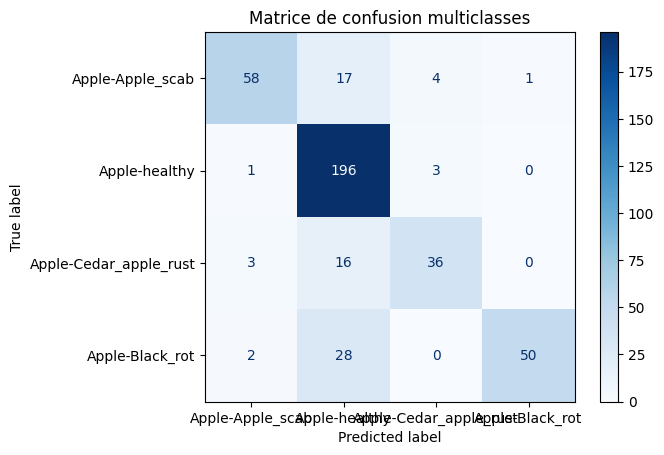

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Liste des noms des classes pour l'affichage
class_names = ['Apple-Apple_scab', 'Apple-healthy', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']

# Prédictions sur les données de test
y_pred = model.predict(X_test_multi)  # Utiliser les données test multi-classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_multi, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion multiclasses")
plt.show()


2. Rapport de classification

In [8]:
from sklearn.metrics import classification_report

class_names = ['Apple-Apple_scab', 'Apple-healthy', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']

print("Rapport de classification :\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Rapport de classification :

                        precision    recall  f1-score   support

      Apple-Apple_scab       0.91      0.72      0.81        80
         Apple-healthy       0.76      0.98      0.86       200
Apple-Cedar_apple_rust       0.84      0.65      0.73        55
       Apple-Black_rot       0.98      0.62      0.76        80

              accuracy                           0.82       415
             macro avg       0.87      0.75      0.79       415
          weighted avg       0.84      0.82      0.81       415



# 4.Visualisation des performances (accuracy et loss)

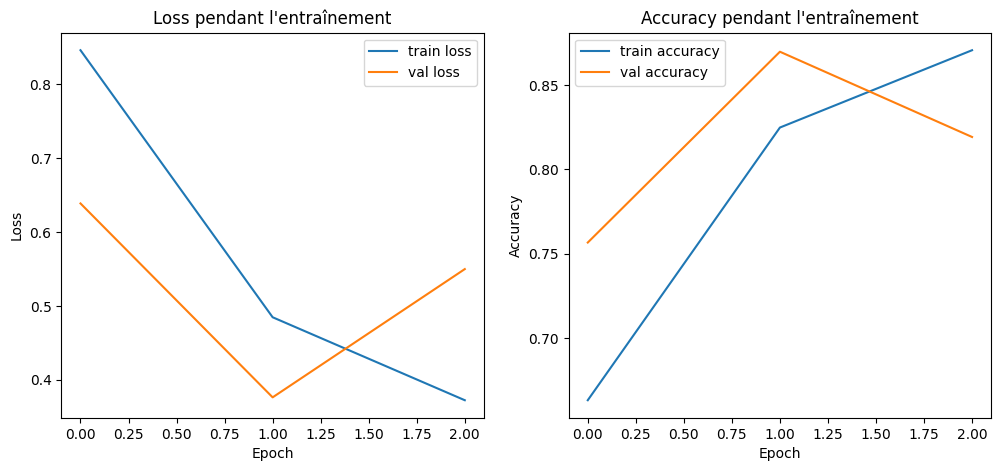

In [9]:
import matplotlib.pyplot as plt

# Affichage des courbes de loss et accuracy pendant l'entraînement

plt.figure(figsize=(12, 5))

# Courbe de la fonction de perte (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss pendant l'entraînement")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Courbe de la précision (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy pendant l'entraînement")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


# 5.prédictions avec les images

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 884ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


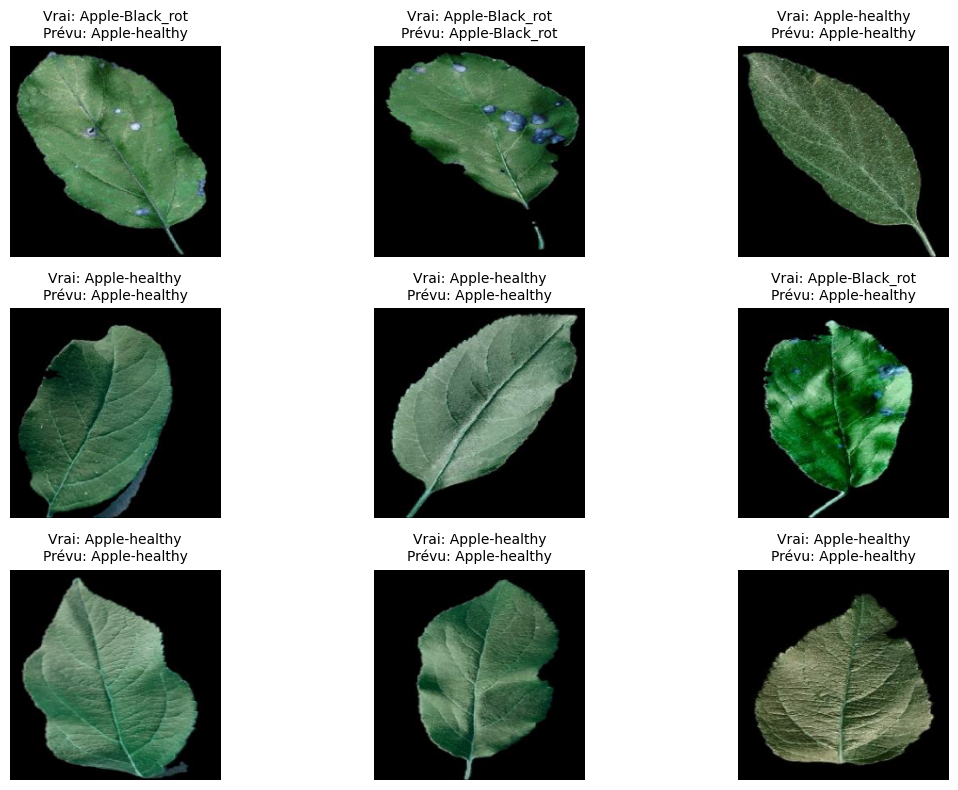

In [10]:
# Prédictions sur les données de test multiclasse
y_pred_multi = model.predict(X_test_multi)
import random
import matplotlib.pyplot as plt
import numpy as np

labels = ['Apple-Apple_scab', 'Apple-healthy', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']

# Générer les prédictions
y_pred_multi = model.predict(X_test_multi)

plt.figure(figsize=(12, 8))
for i in range(9):
    index = random.randint(0, len(X_test_multi) - 1)
    img = X_test_multi[index]
    true_label = labels[np.argmax(y_test_multi[index])]
    pred_label = labels[np.argmax(y_pred_multi[index])]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Vrai: {true_label}\nPrévu: {pred_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


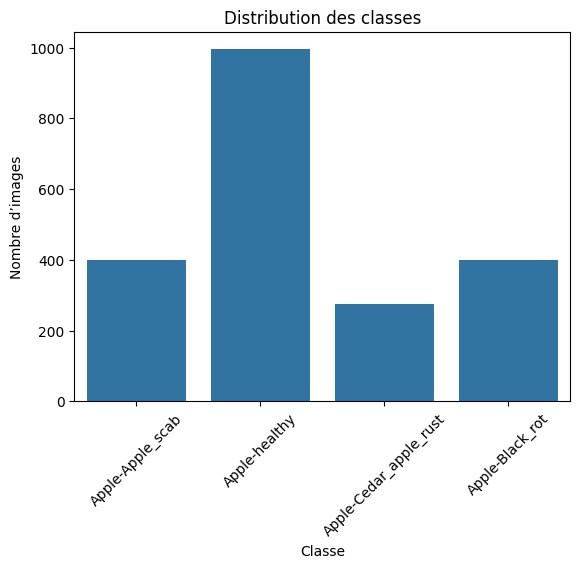

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nombre d’exemples par classe dans l’ensemble complet multiclasse
labels = np.argmax(y_multi, axis=1)  # Utiliser y_multi (one-hot)
labels_names = ['Apple-Apple_scab', 'Apple-healthy', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']
label_names = [labels_names[i] for i in labels]

sns.countplot(x=label_names)
plt.title("Distribution des classes")
plt.xticks(rotation=45)
plt.xlabel("Classe")
plt.ylabel("Nombre d’images")
plt.show()


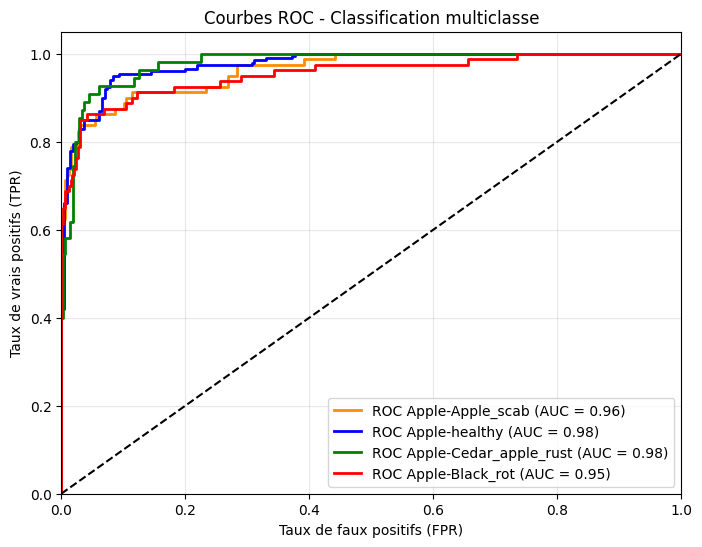

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

# Classes
classes = ['Apple-Apple_scab', 'Apple-healthy', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']
n_classes = len(classes)

# Exemple : y_true sous forme d'entiers -> convertis en one-hot
if y_true.ndim == 1 or y_true.shape[1] != n_classes:
    y_true = to_categorical(y_true, num_classes=n_classes)

# y_pred doit être un tableau 2D (n_samples, n_classes)
# Par exemple : y_pred = model.predict(X_test_multi)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['darkorange', 'blue', 'green', 'red']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC - Classification multiclasse')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 966ms/step


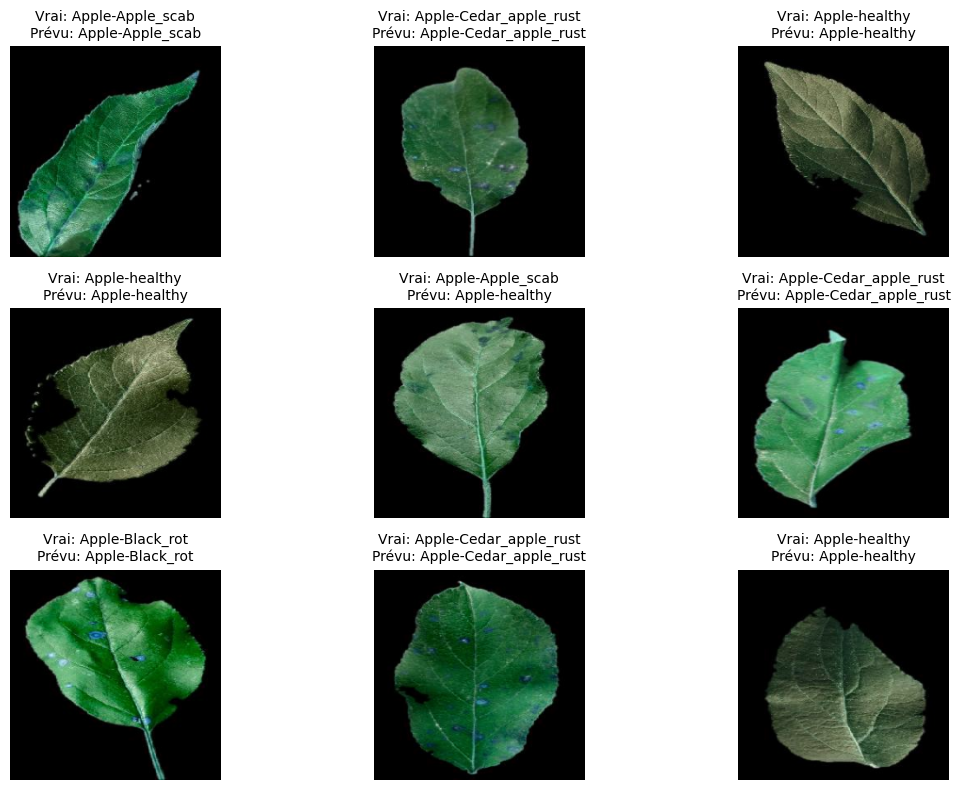


--- Treatment Recommendations ---

Image 1 : Apple-Apple_scab
Recommended Treatment : Use a captan-based fungicide. Remove infected leaves.
--------------------------------------------------
Image 2 : Apple-Cedar_apple_rust
Recommended Treatment : Avoid planting near junipers. Use myclobutanil.
--------------------------------------------------
Image 3 : Apple-healthy
Recommended Treatment : No treatment needed. The plant is healthy.
--------------------------------------------------
Image 4 : Apple-healthy
Recommended Treatment : No treatment needed. The plant is healthy.
--------------------------------------------------
Image 5 : Apple-healthy
Recommended Treatment : No treatment needed. The plant is healthy.
--------------------------------------------------
Image 6 : Apple-Cedar_apple_rust
Recommended Treatment : Avoid planting near junipers. Use myclobutanil.
--------------------------------------------------
Image 7 : Apple-Black_rot
Recommended Treatment : Prune dead branches.

In [14]:
import random
import matplotlib.pyplot as plt
import numpy as np

labels = ['Apple-Apple_scab', 'Apple-healthy', 'Apple-Cedar_apple_rust', 'Apple-Black_rot']

# Prédictions
y_pred_multi = model.predict(X_test_multi)

# Dictionnaire des traitements associés aux maladies
traitements = {
    'Apple-Apple_scab': "Use a captan-based fungicide. Remove infected leaves.",
    'Apple-Black_rot': "Prune dead branches. Apply thiophanate-methyl..",
    'Apple-Cedar_apple_rust': "Avoid planting near junipers. Use myclobutanil.",
    'Apple-healthy': "No treatment needed. The plant is healthy."
}

# Choisir 9 indices aléatoires une seule fois
indices = random.sample(range(len(X_test_multi)), 9)

# Affichage des images + vrai/pred
plt.figure(figsize=(12, 8))
for i, index in enumerate(indices):
    img = X_test_multi[index]
    true_label = labels[np.argmax(y_test_multi[index])]
    pred_label = labels[np.argmax(y_pred_multi[index])]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Vrai: {true_label}\nPrévu: {pred_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Affichage des traitements basés sur la prédiction
print("\n--- Treatment Recommendations ---\n")
for i, index in enumerate(indices):
    pred_label = labels[np.argmax(y_pred_multi[index])]
    print(f"Image {i+1} : {pred_label}")
    print("Recommended Treatment :", traitements[pred_label])
    print("-" * 50)
